In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphs_util

# Results Plots

In [142]:
results_file = 'aggregate_results.tsv'
df = pd.read_csv(results_file, sep="\t", header=None, index_col=0).T
df.head()

,Human,DGPT-Gab-MC
1,3.94,3.47
2,2.86,3.65
3,3.22,3.74
4,3.42,3.32
5,3.39,3.50


In [143]:
# Create a new dataframe with a Ratings column and a System column from df

df_human = df[["Human"]]
df_human["System"] = "Human"
df_human = df_human.rename(columns={"Human": "Rating"})

df_dgpt_gab_mc = df[["DGPT-Gab-MC"]]
df_dgpt_gab_mc["System"] = "DGPT-Gab-MC"
df_dgpt_gab_mc = df_dgpt_gab_mc.rename(columns={"DGPT-Gab-MC": "Rating"})

# Concatenate the two dataframes on top of each other with unique index
df_concat = pd.concat([df_human, df_dgpt_gab_mc], ignore_index=True)
ratings = df_concat
ratings.head()

,Rating,System
0,3.94,Human
1,2.86,Human
2,3.22,Human
3,3.42,Human
4,3.39,Human


In [144]:
BINWIDTH = 0.5
XMIN = 1
XMAX = 5
YMIN=0
YMAX=45

Notice the Human responses tail to the right, while the System responses tail to the left. The system responses are concentrated between 3 and 4, because the responses are generic and repetitive (but safe). The human responses are more variable and spread out due to more unpredictability, with a tail to the right due to some extremely high-quality responses. The system responses tail to the left, due to occasional extremely poor responses.

<Figure size 420x350 with 0 Axes>

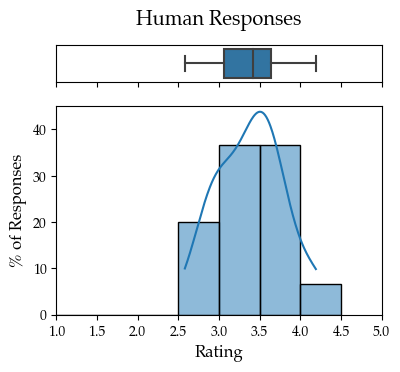

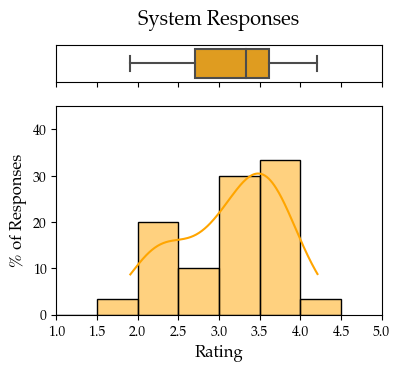

In [223]:

FIG_WIDTH = 4.2
FIG_HEIGHT = 3.5
FIGSIZE = (FIG_WIDTH, FIG_HEIGHT)

def plot_system(system, color=None, title=None):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, squeeze=True, figsize=FIGSIZE)

    sns.boxplot(x=df[system], ax=ax_box, color=color)
    sns.histplot(x=df[system], kde=True, stat='percent', ax=ax_hist, bins=np.arange(XMIN, XMAX, BINWIDTH), color=color)

    plt.xlim(XMIN, XMAX)
    plt.ylim(YMIN, YMAX)

    plt.title(title, y=1.35)

    ax_box.set(xlabel='')
    ax_box.set(xticks=np.arange(XMIN, XMAX+BINWIDTH, BINWIDTH));
    ax_box.set(yticks=[])

    ax_hist.set(ylabel='% of Responses')
    ax_hist.set(xticks=np.arange(XMIN, XMAX+BINWIDTH, BINWIDTH));
    ax_hist.set(xlabel='Rating');

    

plot_system("Human", title="Human Responses")
plot_system("DGPT-Gab-MC", "orange", title="System Responses")

# Inter-Rater Reliability

In [146]:
from krippendorff import alpha

results_file = "results_all_raters.tsv"
reliability_data = pd.read_csv(results_file, sep="\t", header=None).to_numpy()
score = alpha(reliability_data=reliability_data, level_of_measurement="interval", value_domain=[1, 2, 3, 4, 5])
print(f"Krippendorff's alpha: {score:.2f}")

[[ 27.75757576  38.15151515  36.33333333  27.33333333   8.42424242]
 [ 38.15151515  86.06060606 111.12121212  98.09090909  35.57575758]
 [ 36.33333333 111.12121212 189.63636364 197.06060606  72.84848485]
 [ 27.33333333  98.09090909 197.06060606 239.15151515 100.36363636]
 [  8.42424242  35.57575758  72.84848485 100.36363636  46.78787879]]
Krippendorff's alpha: 0.21
